In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import random
import math
import numpy as np
import h5py as h5
import imageio
import matplotlib.pyplot as plt
import pickle
from tqdm.notebook import tqdm
from itertools import chain, cycle
from fast_ffn.config import get_cfg_defaults
# from fast_ffn.training.dataloader.dataset import PrecomputedDataset
# from fast_ffn.training.dataloader.build import build_dataloader
# from connectomics.data.augmentation import build_train_augmentor
# from fast_ffn.training import Trainer, TwoStepTrainer, PrecomputedTrainer, BorderTrainer, PrecomputedBorderTrainer
from fast_ffn.training import Trainer, PolicyTrainer, MultiTrainer

cfg = get_cfg_defaults()
# cfg.merge_from_file('/n/home11/abanerjee/fast_ffn/configs/Fast-FFN-SNEMI3D_Policy.yaml')
# cfg.merge_from_file('/n/home11/abanerjee/fast_ffn/configs/Fast-FFN-SNEMI3D_Policy_Pre.yaml')
cfg.merge_from_file('/n/home11/abanerjee/fast_ffn/configs/Fast-FFN-SNEMI3D_Multigrid.yaml')

# cfg.MODEL.IN_PLANES=5
# cfg.DATASET.INPUT_SIZE=cfg.MODEL.INPUT_SIZE=(17, 65, 65)
cfg.SYSTEM.PARALLEL='DP'
cfg.SYSTEM.NUM_GPUS=1

# trainer = PrecomputedTrainer(cfg, torch.device('cuda:0'), None, '~/ffn_outs/', '/n/home11/abanerjee/ffn_outs/SNEMI3D/experiment_25/checkpoint_30000.pth.tar')
# trainer = PolicyTrainer(cfg, torch.device('cpu'), None, '~/ffn_outs/') #, '/n/home11/abanerjee/ffn_outs/SNEMI3D/experiment_30/checkpoint_100000.pth.tar')
trainer = MultiTrainer(cfg, torch.device('cpu'), None, '~/ffn_outs/') #, '/n/home11/abanerjee/ffn_outs/SNEMI3D/experiment_34/checkpoint_87000.pth.tar')

Experiment dir:  ~/ffn_outs/experiment_86
Full config saved to ~/ffn_outs/experiment_86/config.yaml
model:  FFN_Fastai
Parallelism with DataParallel.
Optimizer:  AdamW
Build data dataset ===>
Image shape: (100, 1024, 1024)


/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607369981906/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


Label shape: (100, 1024, 1024)
Sample size required for the augmentor: [ 27 212 212]
Sample size required for the augmentor: [  9 165 165]
Using copy paste augmentation
Total number of samples to be generated:  48911706
Build data loader ===>


In [3]:
if hasattr(trainer, 'log_cache'):
    del trainer.log_cache
trainer.train()

Start training ===>
Sanity check of output sizes: 
torch.Size([8, 1, 7, 92, 92])
[Iteration 00000] Training loss: 5.22139, LR: 0.00800.
Data time: 0.4562, Forw time: 11.0731, Back time: 17.2512, Iter time: 28.7805, Avg Iter Time: 28.7805


/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


KeyboardInterrupt: 

In [4]:
for name, param in trainer.model.named_parameters():
    if param.grad is None:
        print(name)

module.middle_conv.0.weight
module.middle_conv.0.bias
module.middle_conv.2.0.weight
module.middle_conv.3.0.weight
module.middle_conv.4.weight
module.middle_conv.4.bias


In [10]:
trainer.model.module.planar_att1.z_att.qkv.weight.grad.squeeze().sum()

tensor(1.2477e-06)

In [11]:
trainer.model.module.planar_att3.z_att.qkv.weight.grad.squeeze().sum()

tensor(0.0010)

In [12]:
trainer.model.module.out_conv.weight.grad.sum()

tensor(-2.7364)

In [13]:
trainer.model.module.point_att3.conv_act_conv_norm[3].weight.grad.squeeze().sum()

tensor(-0.0017)

In [14]:
trainer.model.module.point_att3.conv_norm[0].weight.grad.squeeze().sum()

tensor(-5.7853e-09)

In [15]:
trainer.model.module.conv1.conv[0].weight.grad.squeeze()

tensor([[[[[ 3.2934e-09, -1.1729e-08,  2.5007e-08],
           [-5.1180e-08,  3.8557e-08,  1.0948e-08],
           [-1.2059e-07, -7.3374e-08, -2.1654e-08]],

          [[-8.3621e-09, -4.8462e-08,  2.8481e-09],
           [-1.1224e-08,  6.9541e-08, -1.2004e-08],
           [ 4.6258e-08,  4.1381e-08,  6.6726e-08]],

          [[-1.2250e-07, -1.1359e-07, -1.2965e-07],
           [-1.0675e-07, -2.8446e-08, -2.6323e-08],
           [-7.3880e-08, -5.0971e-09,  5.3358e-08]]],


         [[[ 9.0525e-10,  8.0222e-10,  7.2478e-10],
           [ 7.8517e-10,  7.1018e-10,  5.8032e-10],
           [ 6.7175e-10,  5.7396e-10,  4.8559e-10]],

          [[ 7.7117e-10,  8.3473e-10,  9.2988e-10],
           [ 7.2180e-10,  7.8575e-10,  8.7231e-10],
           [ 7.0289e-10,  7.4637e-10,  7.8926e-10]],

          [[ 2.4871e-10,  3.2640e-10,  4.5985e-10],
           [ 2.4514e-10,  3.3081e-10,  4.4479e-10],
           [ 2.2998e-10,  2.8818e-10,  4.0154e-10]]]],



        [[[[-3.8626e-08, -4.3516e-08, -4.1442e

In [5]:
import torch.nn as nn
model = nn.Conv3d(32,32,1,bias=False)
opt = torch.optim.Adam(model.parameters())
torch.autograd.set_detect_anomaly(True)
for _ in range(100):
    ip = torch.randn(1,32,1,1,1)
    op = model(ip).sum()
    opt.zero_grad()
    op.backward()
    opt.step()

In [ ]:
torch.autograd.set_detect_anomaly(True)
if hasattr(trainer, 'log_cache'):
    del trainer.log_cache
trainer.train()

Start training ===>
tensor([[0.8400, 0.9845, 0.8372]])
tensor([[0.8400, 0.9845, 0.8372]])
tensor([[0.8400, 0.9845, 0.8372]])


/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


Sanity check of output sizes: 
torch.Size([1, 1, 25, 129, 129])
[Iteration 00000] Training loss: 1.84789, LR: 0.00000.
Data time: 0.0031, Forw time: 11.0870, Back time: 22.0556, Iter time: 33.1457, Avg Iter Time: 33.1457
tensor([[0.0000, 0.9690, 0.7829]])
tensor([[0.0000, 0.9690, 0.7829]])
tensor([[0.0000, 0.9690, 0.7829]])
[Iteration 00001] Training loss: 1.80107, LR: 0.00000.
Data time: 0.1267, Forw time: 9.7144, Back time: 23.7090, Iter time: 33.5502, Avg Iter Time: 33.3480
tensor([[0.7600, 0.0543, 0.0000]])
tensor([[0.7600, 0.0543, 0.0000]])
tensor([[0.7600, 0.0543, 0.0000]])
[Iteration 00002] Training loss: 1.65917, LR: 0.00000.
Data time: 0.0048, Forw time: 9.4361, Back time: 22.2766, Iter time: 31.7175, Avg Iter Time: 32.8045
tensor([[0.6400, 0.8992, 0.1705]])
tensor([[0.6400, 0.8992, 0.1705]])
tensor([[0.6400, 0.8992, 0.1705]])
[Iteration 00003] Training loss: 1.49799, LR: 0.00000.
Data time: 0.0046, Forw time: 9.5811, Back time: 22.7797, Iter time: 32.3654, Avg Iter Time: 32.6

In [3]:
torch.autograd.set_detect_anomaly(True)
if hasattr(trainer, 'log_cache'):
    del trainer.log_cache
trainer.train()

Start training ===>
0.0:.5f
0.0:.5f
0.0:.5f


/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


Sanity check of output sizes: 
torch.Size([1, 1, 25, 129, 129])
[Iteration 00000] Training loss: 1.13490, LR: 0.00000.
Data time: 0.0071, Forw time: 9.4546, Back time: 17.7100, Iter time: 27.1717, Avg Iter Time: 27.1717
0.0:.5f
0.0:.5f
-9.9999863323319e-07:.5f
[Iteration 00001] Training loss: 1.04460, LR: 0.00000.
Data time: 0.0002, Forw time: 8.2767, Back time: 16.9031, Iter time: 25.1800, Avg Iter Time: 26.1759
0.0:.5f
0.0:.5f
-2.9979869395901915e-06:.5f
[Iteration 00002] Training loss: 1.05903, LR: 0.00000.
Data time: 0.0096, Forw time: 7.8113, Back time: 16.6301, Iter time: 24.4510, Avg Iter Time: 25.6009
0.0:.5f
0.0:.5f
-5.577820047619753e-06:.5f
[Iteration 00003] Training loss: 0.79228, LR: 0.00000.
Data time: 0.0002, Forw time: 7.8159, Back time: 16.7457, Iter time: 24.5618, Avg Iter Time: 25.3411
0.0:.5f
0.0:.5f
-8.989537491288502e-06:.5f


/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: Error detected in SlowConv3DBackward. Traceback of forward call that caused the error:
  File "/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/tornado/pla

RuntimeError: Function 'SlowConv3DBackward' returned nan values in its 1th output.

In [ ]:
if hasattr(trainer, 'log_cache'):
    del trainer.log_cache
trainer.train()

Start training ===>


/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


Sanity check of output sizes: 
torch.Size([1, 1, 25, 129, 129])
[Iteration 00000] Training loss: 1.65846, LR: 0.00000.
Data time: 0.0027, Forw time: 12.5626, Back time: 29.8282, Iter time: 42.3935, Avg Iter Time: 42.3935
[Iteration 00001] Training loss: 1.71154, LR: 0.00000.
Data time: 0.1770, Forw time: 11.6572, Back time: 27.7121, Iter time: 39.5463, Avg Iter Time: 40.9699
[Iteration 00002] Training loss: 1.47204, LR: 0.00000.
Data time: 0.0054, Forw time: 11.3790, Back time: 27.4102, Iter time: 38.7946, Avg Iter Time: 40.2448
[Iteration 00003] Training loss: 1.46870, LR: 0.00000.
Data time: 0.0003, Forw time: 11.7101, Back time: 27.4278, Iter time: 39.1382, Avg Iter Time: 39.9681
[Iteration 00004] Training loss: 1.70400, LR: 0.00001.
Data time: 0.0047, Forw time: 12.4183, Back time: 28.7107, Iter time: 41.1338, Avg Iter Time: 40.2013
[Iteration 00005] Training loss: 1.52467, LR: 0.00001.
Data time: 0.0057, Forw time: 12.0279, Back time: 28.1206, Iter time: 40.1543, Avg Iter Time: 40

In [6]:
for name,param in trainer.model.named_parameters():
    if 'gamma' in name:
        print(param.grad)

tensor([0.])
tensor([0.])
tensor([0.0071])


In [4]:
for name,param in trainer.model.named_parameters():
    if param.grad is not None and torch.isnan(param.grad).sum()!=0:
        print(name)

module.conv1.conv.0.weight
module.conv1.conv.0.bias
module.conv1.conv.1.weight
module.conv1.conv.1.bias
module.conv1.conv.2.weight
module.conv1.conv.2.bias
module.conv1.conv.3.weight
module.conv1.conv.3.bias
module.bn1.weight
module.bn1.bias
module.layer0.0.DWConv.0.weight
module.layer0.0.DWConv.1.weight
module.layer0.0.DWConv.2.weight
module.layer0.0.DWConv.3.weight
module.layer0.0.layers1_a.0.weight
module.layer0.0.layers1_a.1.weight
module.layer0.0.layers1_a.1.bias
module.layer0.0.layers1_b.0.weight
module.layer0.0.layers1_b.0.bias
module.layer0.0.layers2.0.weight
module.layer0.0.layers2.0.bias
module.layer0.0.layers2.1.weight
module.layer0.0.layers2.1.bias
module.layer0.1.DWConv.0.weight
module.layer0.1.DWConv.1.weight
module.layer0.1.DWConv.2.weight
module.layer0.1.DWConv.3.weight
module.layer0.1.layers1_a.0.weight
module.layer0.1.layers1_a.1.weight
module.layer0.1.layers1_a.1.bias
module.layer0.1.layers1_b.0.weight
module.layer0.1.layers1_b.0.bias
module.layer0.1.layers2.0.weight

In [11]:
trainer.model.module.planar_att1.z_att.qkv.weight.grad.squeeze().sum()

tensor(0.)

In [12]:
trainer.model.module.planar_att3.z_att.qkv.weight.grad.squeeze().sum()

tensor(0.)

In [13]:
trainer.model.module.out_conv.weight.grad.sum()

tensor(8.1198)

In [15]:
trainer.model.module.point_att3.conv_act_conv_norm[3].weight.grad.squeeze().sum()

tensor(0.0134)

In [16]:
trainer.model.module.point_att3.conv_norm[0].weight.grad.squeeze().sum()

tensor(0.)

In [12]:
trainer.model.module.conv1.conv[0].weight.grad

tensor([[[[[nan, nan, nan],
           [nan, nan, nan],
           [nan, nan, nan]],

          [[nan, nan, nan],
           [nan, nan, nan],
           [nan, nan, nan]],

          [[nan, nan, nan],
           [nan, nan, nan],
           [nan, nan, nan]]],


         [[[nan, nan, nan],
           [nan, nan, nan],
           [nan, nan, nan]],

          [[nan, nan, nan],
           [nan, nan, nan],
           [nan, nan, nan]],

          [[nan, nan, nan],
           [nan, nan, nan],
           [nan, nan, nan]]]],



        [[[[nan, nan, nan],
           [nan, nan, nan],
           [nan, nan, nan]],

          [[nan, nan, nan],
           [nan, nan, nan],
           [nan, nan, nan]],

          [[nan, nan, nan],
           [nan, nan, nan],
           [nan, nan, nan]]],


         [[[nan, nan, nan],
           [nan, nan, nan],
           [nan, nan, nan]],

          [[nan, nan, nan],
           [nan, nan, nan],
           [nan, nan, nan]],

          [[nan, nan, nan],
           [nan, n

In [4]:
loss = trainer.model(torch.randn(1,2,25,129,129)).sum()
loss.backward()

In [6]:
for name, param in trainer.model.named_parameters():
    if param.grad is None:
        print(name)

module.latlayers.0.0.weight
module.latlayers.0.1.weight
module.latlayers.0.1.bias
module.latlayers.1.0.weight
module.latlayers.1.1.weight
module.latlayers.1.1.bias
module.latlayers.2.0.weight
module.latlayers.2.1.weight
module.latlayers.2.1.bias
module.latlayers.3.0.weight
module.latlayers.3.1.weight
module.latlayers.3.1.bias
module.latlayers.4.0.weight
module.latlayers.4.1.weight
module.latlayers.4.1.bias


In [5]:
trainer.model.module.backbone

IntermediateLayerGetter(
  (conv1): DilatedBlock(
    (conv): ModuleList(
      (0): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False, padding_mode=replicate)
      (1): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(2, 2, 2), dilation=(2, 2, 2), bias=False, padding_mode=replicate)
      (2): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(4, 4, 4), dilation=(4, 4, 4), bias=False, padding_mode=replicate)
      (3): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(8, 8, 8), dilation=(8, 8, 8), bias=False, padding_mode=replicate)
    )
  )
  (bn1): GroupNorm(16, 32, eps=1e-05, affine=True)
  (relu): ELU(alpha=1.0, inplace=True)
  (layer0): Sequential(
    (0): InvertedResidualDilated(
      (DWConv): ModuleList(
        (0): Conv3d(8, 8, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), groups=8, bias=False, padding_mode=replicate)
        (1): Conv3d(8, 8, kernel_size=(1, 3, 3), stride=(1, 1, 1), p

In [4]:
cfg.MODEL.INPUT_SIZE

[25, 129, 129]

In [4]:
from fast_ffn.training.dataloader.build import build_dataloader
dataloader = build_dataloader(cfg)

Build data dataset ===>
Image shape: (116, 1280, 1280)
Label shape: (116, 1280, 1280)
Sample size required for the augmentor: [ 35 372 372]
sample input size: [ 35 372 372]
Using copy paste augmentation
Total number of samples to be generated:  67755042
Build data loader ===>


In [5]:
dataloader.dataset.sample_volume_size

array([ 35, 372, 372])

In [6]:
batch = iter(dataloader).next()

In [7]:
batch['image'].shape

torch.Size([1, 33, 257, 257])

In [9]:
from fast_ffn.training.dataloader.build import build_dataset
cfg.DATASET.INPUT_SIZE = (33, 513, 513)
cfg.DATASET.DATA_AUGMENTATION = True
# ds = build_dataset(cfg, False)
ds = build_dataset(cfg, True, (1/4, 1/2**0.5, 1/2**0.5))

Build data dataset ===>
Image shape: (100, 1024, 1024)
Label shape: (100, 1024, 1024)
Sample size required for the augmentor: [ 35 692 692]
Sample size required for the augmentor: [ 27 212 212]
Using copy paste augmentation
Total number of samples to be generated:  7318674


In [10]:
ds[0]

{'image': tensor([[[ 1.4981,  1.5410,  1.3566,  ...,  0.4082,  0.9042,  1.0226],
          [ 1.1582,  1.2333,  0.6895,  ...,  0.7495,  1.1790,  1.4202],
          [ 0.1609, -0.1214,  0.1996,  ...,  0.9758,  1.4659,  1.6406],
          ...,
          [-0.8175, -1.0803, -0.8680,  ...,  0.0805,  0.8600,  1.0408],
          [-0.9193, -1.1398, -0.7783,  ...,  0.5383,  0.6879,  0.7732],
          [-1.1351, -1.0566, -0.7486,  ...,  0.3376,  0.1520,  0.2951]],
 
         [[ 0.6710,  0.3904,  0.3873,  ...,  0.6168,  0.2770, -0.3291],
          [ 0.2488,  0.5797,  0.6833,  ...,  0.8472,  0.4131,  0.2289],
          [ 0.3511,  0.6264,  0.6443,  ...,  0.9123,  0.7137,  0.5334],
          ...,
          [-0.9552, -1.4946, -1.5960,  ...,  1.0918,  1.2782,  1.0661],
          [-1.4082, -1.4414, -1.3246,  ...,  1.3219,  0.8587,  0.7900],
          [-1.6530, -1.3639, -1.1027,  ...,  0.9140,  0.4877,  0.5106]],
 
         [[ 0.2389,  0.0761,  0.5121,  ..., -0.2677, -1.0364, -0.8384],
          [ 0.6493,

In [12]:
a,b = None

TypeError: cannot unpack non-iterable NoneType object

In [8]:
%debug

> /n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/skimage/transform/_warps.py(91)resize()
     89 
     90     """
---> 91     output_shape = tuple(output_shape)
     92     output_ndim = len(output_shape)
     93     input_shape = image.shape

ipdb> exit


In [ ]:
def step():
    import ipdb; ipdb.set_trace()
    ds[0]

step()

> <ipython-input-4-b0a95fac0c8e>(3)step()
      2     import ipdb; ipdb.set_trace()
----> 3     ds[0]
      4 

ipdb> s
--Call--
> /n/home11/abanerjee/fast_ffn/fast_ffn/training/dataloader/dataset.py(65)__getitem__()
     64 
---> 65     def __getitem__(self, index):
     66         # import ipdb; ipdb.set_trace()

ipdb> n
> /n/home11/abanerjee/fast_ffn/fast_ffn/training/dataloader/dataset.py(67)__getitem__()
     66         # import ipdb; ipdb.set_trace()
---> 67         vol_size = self.sample_volume_size
     68         while True:

ipdb> 
> /n/home11/abanerjee/fast_ffn/fast_ffn/training/dataloader/dataset.py(69)__getitem__()
     68         while True:
---> 69             try:
     70                 pos, out_input, out_label, _ = self._rejection_sampling(vol_size)

ipdb> 
> /n/home11/abanerjee/fast_ffn/fast_ffn/training/dataloader/dataset.py(70)__getitem__()
     69             try:
---> 70                 pos, out_input, out_label, _ = self._rejection_sampling(vol_size)
     71   

ipdb> n
> /n/home11/abanerjee/fast_ffn/fast_ffn/training/dataloader/dataset.py(135)sample_seed()
    134         if len(all_indices) > 1 and all_indices[0] == 0:
--> 135             all_indices, counts = all_indices[1:], counts[1:]
    136         sizes = [[] for _ in range(4)]

ipdb> 
> /n/home11/abanerjee/fast_ffn/fast_ffn/training/dataloader/dataset.py(136)sample_seed()
    135             all_indices, counts = all_indices[1:], counts[1:]
--> 136         sizes = [[] for _ in range(4)]
    137         # for i in range(len(counts)):

ipdb> 
> /n/home11/abanerjee/fast_ffn/fast_ffn/training/dataloader/dataset.py(149)sample_seed()
    148         #         sizes[3].append(all_indices[i])
--> 149         voxels = np.prod(out_label.shape[-3:]) #416025
    150         for i in range(len(counts)):

ipdb> 
> /n/home11/abanerjee/fast_ffn/fast_ffn/training/dataloader/dataset.py(150)sample_seed()
    149         voxels = np.prod(out_label.shape[-3:]) #416025
--> 150         for i in range(len(co

In [3]:
%debug

> /n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/optim/optimizer.py(119)load_state_dict()
    117 
    118         if len(groups) != len(saved_groups):
--> 119             raise ValueError("loaded state dict has a different number of "
    120                              "parameter groups")
    121         param_lens = (len(g['params']) for g in groups)

ipdb> up
> /n/home11/abanerjee/fast_ffn/fast_ffn/training/trainer.py(195)update_checkpoint()
    193             # update optimizer
    194             if 'optimizer' in checkpoint.keys():
--> 195                 self.optimizer.load_state_dict(checkpoint['optimizer'])
    196 
    197             if 'lr_scheduler' in checkpoint.keys():

ipdb> checkpoint['optimizer']
{'state': {0: {'momentum_buffer': tensor([[[[[ 4.7077e-02,  4.2289e-02,  3.4322e-02],
           [ 4.1798e-02,  3.2839e-02,  2.7570e-02],
           [ 3.4748e-02,  2.7047e-02,  2.1590e-02]],

          [[ 2.6631e-02,  3.0725e-02,  2.5298e-02],
    

ipdb> checkpoint['optimizer']['state'].keys()
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169])
ipdb> checkpoint['optimizer']['state']['0']
*** KeyError: '0'
ipdb> checkpoint['optimizer']['state'][0]
{'momentum_buffer': tensor([[[[[ 4.7077e-02,  4.2289e-02,  3.4322e-02],
           [ 4.1798e-02,  

ipdb> checkpoint['optimizer']['param_groups']
[{'lr': 0.00010000000000000002, 'weight_decay': 0.0001, 'momentum': 0.9, 'dampening': 0, 'nesterov': False, 'initial_lr': 0.01, 'params': [0]}, {'lr': 0.00010000000000000002, 'weight_decay': 0.0001, 'momentum': 0.9, 'dampening': 0, 'nesterov': False, 'initial_lr': 0.01, 'params': [1]}, {'lr': 0.00010000000000000002, 'weight_decay': 0.0001, 'momentum': 0.9, 'dampening': 0, 'nesterov': False, 'initial_lr': 0.01, 'params': [2]}, {'lr': 0.00010000000000000002, 'weight_decay': 0.0001, 'momentum': 0.9, 'dampening': 0, 'nesterov': False, 'initial_lr': 0.01, 'params': [3]}, {'lr': 0.00010000000000000002, 'weight_decay': 0.0, 'momentum': 0.9, 'dampening': 0, 'nesterov': False, 'initial_lr': 0.01, 'params': [4]}, {'lr': 0.00010000000000000002, 'weight_decay': 0.0, 'momentum': 0.9, 'dampening': 0, 'nesterov': False, 'initial_lr': 0.01, 'params': [5]}, {'lr': 0.00010000000000000002, 'weight_decay': 0.0001, 'momentum': 0.9, 'dampening': 0, 'nesterov': F

ipdb> down
> /n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/optim/optimizer.py(119)load_state_dict()
    117 
    118         if len(groups) != len(saved_groups):
--> 119             raise ValueError("loaded state dict has a different number of "
    120                              "parameter groups")
    121         param_lens = (len(g['params']) for g in groups)

ipdb> up
> /n/home11/abanerjee/fast_ffn/fast_ffn/training/trainer.py(195)update_checkpoint()
    193             # update optimizer
    194             if 'optimizer' in checkpoint.keys():
--> 195                 self.optimizer.load_state_dict(checkpoint['optimizer'])
    196 
    197             if 'lr_scheduler' in checkpoint.keys():

ipdb> len(groups), len(saved_groups)
*** NameError: name 'groups' is not defined
ipdb> down
> /n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/optim/optimizer.py(119)load_state_dict()
    117 
    118         if len(groups) != len(saved_groups)

In [3]:
%debug

> /n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/optim/optimizer.py(119)load_state_dict()
    117 
    118         if len(groups) != len(saved_groups):
--> 119             raise ValueError("loaded state dict has a different number of "
    120                              "parameter groups")
    121         param_lens = (len(g['params']) for g in groups)

ipdb> len(saved_groups)
170
ipdb> len9groups)
*** SyntaxError: unmatched ')'
ipdb> len(groups)
192
ipdb> groups
[{'params': [Parameter containing:
tensor([[[[[-7.8752e-02, -6.7883e-02, -7.9633e-02],
           [-1.9528e-02, -9.7796e-02, -1.7970e-01],
           [ 3.9833e-03, -3.7300e-02,  2.3597e-02]],

          [[-4.4179e-01, -3.4139e-01, -9.7019e-02],
           [-5.0350e-01, -3.3260e-01, -1.7515e-01],
           [-2.0602e-01, -2.7980e-01, -6.0604e-02]],

          [[-3.5019e-01, -3.0359e-01, -2.2027e-01],
           [-2.8576e-01, -3.3955e-01, -2.6366e-01],
           [-1.5408e-01, -2.5523e-01, -2.2266e-01]

ipdb> exit


In [7]:
from connectomics.model import build_model
from connectomics.engine.solver import build_optimizer

In [32]:
m = build_model(cfg, torch.device('cpu'))
opt = build_optimizer(cfg, m)

TypeError: super(type, obj): obj must be an instance or subtype of type

In [12]:
saved_opt = torch.load('/n/home11/abanerjee/ffn_outs/SNEMI3D/experiment_30/checkpoint_100000.pth.tar', map_location=torch.device('cpu'))['optimizer']

In [14]:
saved_opt['param_groups']

[{'lr': 0.00010000000000000002,
  'weight_decay': 0.0001,
  'momentum': 0.9,
  'dampening': 0,
  'nesterov': False,
  'initial_lr': 0.01,
  'params': [0]},
 {'lr': 0.00010000000000000002,
  'weight_decay': 0.0001,
  'momentum': 0.9,
  'dampening': 0,
  'nesterov': False,
  'initial_lr': 0.01,
  'params': [1]},
 {'lr': 0.00010000000000000002,
  'weight_decay': 0.0001,
  'momentum': 0.9,
  'dampening': 0,
  'nesterov': False,
  'initial_lr': 0.01,
  'params': [2]},
 {'lr': 0.00010000000000000002,
  'weight_decay': 0.0001,
  'momentum': 0.9,
  'dampening': 0,
  'nesterov': False,
  'initial_lr': 0.01,
  'params': [3]},
 {'lr': 0.00010000000000000002,
  'weight_decay': 0.0,
  'momentum': 0.9,
  'dampening': 0,
  'nesterov': False,
  'initial_lr': 0.01,
  'params': [4]},
 {'lr': 0.00010000000000000002,
  'weight_decay': 0.0,
  'momentum': 0.9,
  'dampening': 0,
  'nesterov': False,
  'initial_lr': 0.01,
  'params': [5]},
 {'lr': 0.00010000000000000002,
  'weight_decay': 0.0001,
  'momentum'

In [25]:
for i,(sp, cp) in enumerate(zip(saved_opt['state'].keys(), opt.param_groups)):
    sp = saved_opt['state'][sp]['momentum_buffer']
    if sp.shape == cp['params'][0].shape:
        continue
    else:
        print(i, sp.shape, cp['params'][0].shape)
        break

18 torch.Size([8, 1, 3, 3, 3]) torch.Size([4, 32])


In [26]:
saved_wt = torch.load('/n/home11/abanerjee/ffn_outs/SNEMI3D/experiment_30/checkpoint_100000.pth.tar', map_location=torch.device('cpu'))['state_dict']

In [28]:
list(saved_wt.keys())[18]

'backbone.layer1.0.DWConv.0.weight'

In [29]:
saved_wt['backbone.layer1.0.DWConv.0.weight'].shape

torch.Size([8, 1, 3, 3, 3])

In [30]:
list(m.state_dict().keys())[18]

'module.backbone.layer0.0.attention.fc.0.weight'

In [34]:
m1 = build_model(cfg, torch.device('cpu'))

TypeError: super(type, obj): obj must be an instance or subtype of type

In [4]:
m = build_model(cfg, torch.device('cpu'))
inp = torch.randn(1,2,33,257,257)
# m(inp).shape

Total number of parameters:  266240
model:  FPN3D
Parallelism with DataParallel.


In [5]:
m

DataParallel(
  (module): FPN3D(
    (backbone): IntermediateLayerGetter(
      (conv1): DilatedBlock(
        (conv): ModuleList(
          (0): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False, padding_mode=replicate)
          (1): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(2, 2, 2), dilation=(2, 2, 2), bias=False, padding_mode=replicate)
          (2): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(4, 4, 4), dilation=(4, 4, 4), bias=False, padding_mode=replicate)
          (3): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(8, 8, 8), dilation=(8, 8, 8), bias=False, padding_mode=replicate)
        )
      )
      (bn1): GroupNorm(16, 32, eps=1e-05, affine=True)
      (relu): ELU(alpha=1.0, inplace=True)
      (layer0): Sequential(
        (0): InvertedResidualDilated(
          (DWConv): ModuleList(
            (0): Conv3d(8, 8, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), groups=8,

In [6]:
m

DataParallel(
  (module): FPN3D(
    (backbone): IntermediateLayerGetter(
      (conv1): DilatedBlock(
        (conv): ModuleList(
          (0): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False, padding_mode=replicate)
          (1): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(2, 2, 2), dilation=(2, 2, 2), bias=False, padding_mode=replicate)
          (2): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(4, 4, 4), dilation=(4, 4, 4), bias=False, padding_mode=replicate)
          (3): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(8, 8, 8), dilation=(8, 8, 8), bias=False, padding_mode=replicate)
        )
      )
      (bn1): GroupNorm(8, 32, eps=1e-05, affine=True)
      (relu): ELU(alpha=1.0, inplace=True)
      (layer0): Sequential(
        (0): InvertedResidualDilated(
          (DWConv): ModuleList(
            (0): Conv3d(8, 8, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), groups=8, 

In [7]:
import torch.nn as nn
nn.GroupNorm(5, 32)(torch.randn(1, 32, 5, 5)).shape

RuntimeError: Expected number of channels in input to be divisible by num_groups, but got input of shape [1, 32, 5, 5] and num_groups=5

In [6]:
m.module.backbone.conv1.conv

ModuleList(
  (0): Conv3d(2, 7, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False, padding_mode=replicate)
  (1): Conv3d(2, 7, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(2, 2, 2), dilation=(2, 2, 2), bias=False, padding_mode=replicate)
  (2): Conv3d(2, 7, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(4, 4, 4), dilation=(4, 4, 4), bias=False, padding_mode=replicate)
  (3): Conv3d(2, 7, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(8, 8, 8), dilation=(8, 8, 8), bias=False, padding_mode=replicate)
)

In [7]:
m.module.backbone.conv1.conv[-1](inp).shape

torch.Size([1, 7, 33, 257, 257])

In [4]:
trainer.model.state_dict()['module.backbone.conv1.weight'].shape

torch.Size([28, 2, 3, 3, 3])

In [6]:
trainer.model.state_dict()['module.backbone.layer0.0.DWConv.0.weight'].shape

torch.Size([7, 1, 1, 3, 3])

In [9]:
trainer.model.module.backbone.layer0

Sequential(
  (0): InvertedResidualDilated(
    (DWConv): ModuleList(
      (0): Conv3d(7, 7, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), groups=7, bias=False, padding_mode=replicate)
      (1): Conv3d(7, 7, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 2, 2), dilation=(1, 2, 2), groups=7, bias=False, padding_mode=replicate)
      (2): Conv3d(7, 7, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 4, 4), dilation=(1, 4, 4), groups=7, bias=False, padding_mode=replicate)
      (3): Conv3d(7, 7, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 8, 8), dilation=(1, 8, 8), groups=7, bias=False, padding_mode=replicate)
    )
    (layers1_a): Sequential(
      (0): Conv3d(28, 28, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
      (1): GroupNorm(14, 28, eps=1e-05, affine=True)
      (2): ELU(alpha=1.0, inplace=True)
    )
    (layers1_b): Sequential(
      (0): GroupNorm(14, 28, eps=1e-05, affine=True)
      (1): ELU(alpha=1.0, inplace=True)
    )
    (laye

In [ ]:
trainer.train()

Start training ===>

Training with single pixel seed
Start training ===>
Sanity check of output sizes: 
torch.Size([1, 2, 33, 257, 257])
> /n/home11/abanerjee/pytorch_connectomics/connectomics/model/loss/criterion.py(112)__call__()
    111         import ipdb; ipdb.set_trace()
--> 112         losses_vis = {}
    113         for i in range(self.num_target): # iterate over tasks

ipdb> self.num_target
2
ipdb> n
> /n/home11/abanerjee/pytorch_connectomics/connectomics/model/loss/criterion.py(113)__call__()
    112         losses_vis = {}
--> 113         for i in range(self.num_target): # iterate over tasks
    114             target_t = self.to_torch(target[i])

ipdb> 
> /n/home11/abanerjee/pytorch_connectomics/connectomics/model/loss/criterion.py(114)__call__()
    113         for i in range(self.num_target): # iterate over tasks
--> 114             target_t = self.to_torch(target[i])
    115             for j in range(len(self.loss_fn[i])): # iterate over losses for a task

ipdb> 
> /n/h

ipdb> loss_temp
tensor(0.1211, device='cuda:0', grad_fn=<MulBackward0>)
ipdb> n
> /n/home11/abanerjee/pytorch_connectomics/connectomics/model/loss/criterion.py(122)__call__()
    121                 loss += loss_temp
--> 122                 loss_tag = self.target_opt[i] + '_' + self.loss_opt[i][j]
    123                 losses_vis[loss_tag] = loss_temp

ipdb> self.loss_w[i][j]
1.0
ipdb> n
> /n/home11/abanerjee/pytorch_connectomics/connectomics/model/loss/criterion.py(123)__call__()
    122                 loss_tag = self.target_opt[i] + '_' + self.loss_opt[i][j]
--> 123                 losses_vis[loss_tag] = loss_temp
    124 

ipdb> loss_tag
'0_WeightedLSBCEFocalLoss'
ipdb> n
> /n/home11/abanerjee/pytorch_connectomics/connectomics/model/loss/criterion.py(115)__call__()
    114             target_t = self.to_torch(target[i])
--> 115             for j in range(len(self.loss_fn[i])): # iterate over losses for a task
    116                 w_mask = None if weight[i][j].shape[-1] == 1 el

ipdb> self.loss_w[i][j]
0.5
ipdb> loss_temp
tensor(0.4321, device='cuda:0', grad_fn=<MulBackward0>)
ipdb> loss
tensor(0.5533, device='cuda:0', grad_fn=<AddBackward0>)
ipdb> n
> /n/home11/abanerjee/pytorch_connectomics/connectomics/model/loss/criterion.py(123)__call__()
    122                 loss_tag = self.target_opt[i] + '_' + self.loss_opt[i][j]
--> 123                 losses_vis[loss_tag] = loss_temp
    124 

ipdb> loss_tag
'0_DiceLoss'
ipdb> n
> /n/home11/abanerjee/pytorch_connectomics/connectomics/model/loss/criterion.py(115)__call__()
    114             target_t = self.to_torch(target[i])
--> 115             for j in range(len(self.loss_fn[i])): # iterate over losses for a task
    116                 w_mask = None if weight[i][j].shape[-1] == 1 else self.to_torch(weight[i][j])

ipdb> 
> /n/home11/abanerjee/pytorch_connectomics/connectomics/model/loss/criterion.py(113)__call__()
    112         losses_vis = {}
--> 113         for i in range(self.num_target): # iterate over ta

ipdb> 
> /n/home11/abanerjee/pytorch_connectomics/connectomics/model/loss/criterion.py(117)__call__()
    116                 w_mask = None if weight[i][j].shape[-1] == 1 else self.to_torch(weight[i][j])
--> 117                 loss_temp = self.loss_w[i][j] * self.loss_fn[i][j](
    118                             self.act[i][j](x[i]),

ipdb> 
> /n/home11/abanerjee/pytorch_connectomics/connectomics/model/loss/criterion.py(121)__call__()
    120                             weight_mask=w_mask)
--> 121                 loss += loss_temp
    122                 loss_tag = self.target_opt[i] + '_' + self.loss_opt[i][j]

ipdb> self.target_opt
['0', '0']
ipdb> loss_temp
tensor(0.1702, device='cuda:0', grad_fn=<MulBackward0>)


In [4]:
import shutil
shutil.rmtree('~/ffn_outs/')

In [ ]:
trainer.train()

Start training ===>

Training with precomputed path
Build data dataset ===>
Image shape: (100, 1024, 1024)
Label shape: (100, 1024, 1024)
Sample size required for the augmentor: [ 33 257 257]
Using copy paste augmentation
Build data loader ===>
[Iteration 30000] Training loss: 0.67254, LR: 0.01000.
Data time: 2.0733, Forw time: 0.9206, Back time: 1.2126, Iter time: 4.2065, Avg Iter Time: 4.2065
[Iteration 30001] Training loss: 0.75953, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1225, Back time: 1.2818, Iter time: 1.4044, Avg Iter Time: 2.8054
[Iteration 30002] Training loss: 0.87141, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1053, Back time: 1.2754, Iter time: 1.3808, Avg Iter Time: 2.3306
[Iteration 30003] Training loss: 0.79580, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1048, Back time: 1.2746, Iter time: 1.3795, Avg Iter Time: 2.0928
[Iteration 30004] Training loss: 0.69340, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1075, Back time: 1.2739, Iter time: 1.3815, Avg Iter Tim

[Iteration 30052] Training loss: 0.65852, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1077, Back time: 1.2769, Iter time: 1.3848, Avg Iter Time: 1.4361
[Iteration 30053] Training loss: 0.69936, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1025, Back time: 1.2753, Iter time: 1.3780, Avg Iter Time: 1.4350
[Iteration 30054] Training loss: 0.65314, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1116, Back time: 1.2745, Iter time: 1.3862, Avg Iter Time: 1.4341
[Iteration 30055] Training loss: 0.71513, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1098, Back time: 1.2758, Iter time: 1.3857, Avg Iter Time: 1.4332
[Iteration 30056] Training loss: 0.70829, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1088, Back time: 1.2766, Iter time: 1.3854, Avg Iter Time: 1.4324
[Iteration 30057] Training loss: 0.75159, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1086, Back time: 1.2770, Iter time: 1.3858, Avg Iter Time: 1.4316
[Iteration 30058] Training loss: 0.70353, LR: 0.01000.
Data time: 0.0001, Forw tim

/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


[Iteration 30100] Training loss: 0.64295, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1019, Back time: 1.3027, Iter time: 1.4048, Avg Iter Time: 1.4117
[Iteration 30101] Training loss: 0.81359, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1008, Back time: 1.2764, Iter time: 1.3773, Avg Iter Time: 1.4113
[Iteration 30102] Training loss: 0.67070, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1094, Back time: 1.2783, Iter time: 1.3878, Avg Iter Time: 1.4111
[Iteration 30103] Training loss: 0.72735, LR: 0.01000.
Data time: 0.0002, Forw time: 0.1067, Back time: 1.2772, Iter time: 1.3841, Avg Iter Time: 1.4108
[Iteration 30104] Training loss: 0.69008, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1003, Back time: 1.2774, Iter time: 1.3778, Avg Iter Time: 1.4105
[Iteration 30105] Training loss: 0.70627, LR: 0.01000.
Data time: 0.0001, Forw time: 0.1010, Back time: 1.2768, Iter time: 1.3779, Avg Iter Time: 1.4102
[Iteration 30106] Training loss: 0.55334, LR: 0.01000.
Data time: 0.0001, Forw tim

> /n/home11/abanerjee/fast_ffn/fast_ffn/training/trainer.py(442)_get_seeds()
    440                 new_seeds.append(torch.from_numpy(partial_mask_seed))
    441                 new_distances.append(torch.from_numpy(1-partial_mask_seed))
--> 442             assert (new_seeds[i] * label[i].numpy()).sum() != 0, "Seed label mismatch"
    443         seeds = torch.stack(new_seeds).unsqueeze(1).to(self.device)
    444         distance = torch.stack(new_distances).unsqueeze(1).to(self.device)

ipdb> import matplotlib.pyplot as plt
ipdb> plt.imshow(new_seeds[i][0]); plt.pause(1)


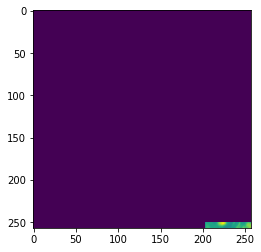

ipdb> plt.imshow(labels[i][0]); plt.pause(1)
*** NameError: name 'labels' is not defined
ipdb> plt.imshow(label[i][0]); plt.pause(1)


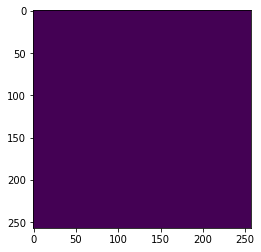

ipdb> label.sum()
tensor(4797)
ipdb> torch.where(label)
(tensor([0, 0, 0,  ..., 0, 0, 0]), tensor([24, 24, 24,  ..., 32, 32, 32]), tensor([ 0,  0,  0,  ..., 39, 39, 39]), tensor([188, 189, 190,  ..., 134, 135, 136]))
ipdb> label.shape
torch.Size([1, 33, 257, 257])
ipdb> plt.imshow(new_seeds[i][24]); plt.pause(1)


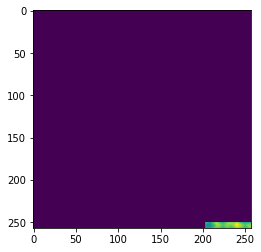

ipdb> plt.imshow(label[i][24]); plt.pause(1)


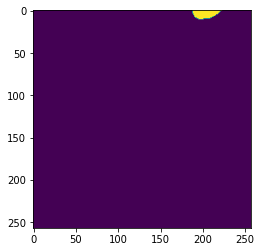

ipdb> up
> /n/home11/abanerjee/fast_ffn/fast_ffn/training/trainer.py(392)train()
    390             rois = sample['roi']
    391             ends = sample['end']
--> 392             seeds, distance = self._get_seeds(canvas, rois, sample['label'], seeds, distance)
    393 
    394             if self.cfg.SOLVER.DIST_LOGITS_EPS is not None:

ipdb> plt.imshow(image[0,0,24].cpu()); plt.pause(1)
*** NameError: name 'plt' is not defined
ipdb> import matplotlib.pyplot as plt
ipdb> plt.imshow(image[0,0,24].cpu()); plt.pause(1)


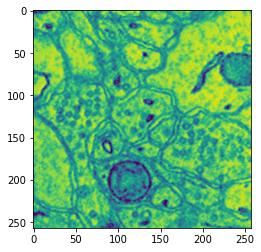

ipdb> down
> /n/home11/abanerjee/fast_ffn/fast_ffn/training/trainer.py(442)_get_seeds()
    440                 new_seeds.append(torch.from_numpy(partial_mask_seed))
    441                 new_distances.append(torch.from_numpy(1-partial_mask_seed))
--> 442             assert (new_seeds[i] * label[i].numpy()).sum() != 0, "Seed label mismatch"
    443         seeds = torch.stack(new_seeds).unsqueeze(1).to(self.device)
    444         distance = torch.stack(new_distances).unsqueeze(1).to(self.device)

ipdb> kc = keep_connected(partial_mask_seed, 1-label[0].numpy())
ipdb> plt.imshow(kc[24]); plt.pause(1)


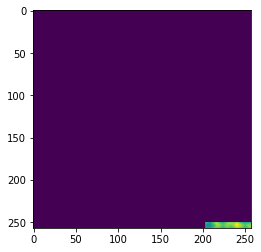

ipdb> label.unqiue()
*** AttributeError: 'Tensor' object has no attribute 'unqiue'
ipdb> label.unique()
tensor([0, 1], dtype=torch.uint8)
ipdb> partial_mask_seed = crop_vol_roi(canvas[i], roi)
ipdb> plt.imshow(partial_mask_seed[24]); plt.pause(1)


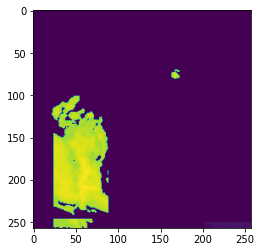

ipdb> kc = keep_connected(partial_mask_seed, 1-label[0].numpy())
ipdb> plt.imshow(kc[24]); plt.pause(1)


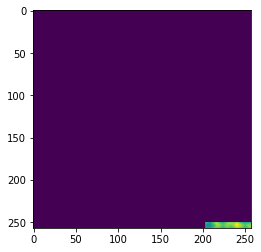

ipdb> np.unique(partial_mask_seed)
array([0.        , 0.02157276, 0.02195087, ..., 0.99867636, 0.9987338 ,
       0.9987361 ], dtype=float32)
ipdb> np.unique(kc[24])
array([0.        , 0.03152261, 0.03159279, 0.03186354, 0.03189941,
       0.03235354, 0.03244584, 0.03244727, 0.03248602, 0.03315511,
       0.03315929, 0.03344322, 0.0334508 , 0.03347247, 0.03361746,
       0.03367473, 0.0338723 , 0.03390855, 0.03392592, 0.03394897,
       0.03402321, 0.03417157, 0.03428743, 0.03445004, 0.03456408,
       0.03469666, 0.03479903, 0.03500404, 0.03500533, 0.03563972,
       0.03581373, 0.03581626, 0.03582976, 0.03605145, 0.03663571,
       0.03663744, 0.03668493, 0.03675412, 0.03691569, 0.0372209 ,
       0.03724498, 0.03729284, 0.03759035, 0.03776628, 0.03785014,
       0.03811279, 0.03814978, 0.03838043, 0.03970426, 0.0399863 ,
       0.03998781, 0.03999484, 0.04020139, 0.04023627, 0.04045886,
       0.04096977, 0.041237  , 0.04130047, 0.04135885, 0.04148762,
       0.04173588, 0.04191417,

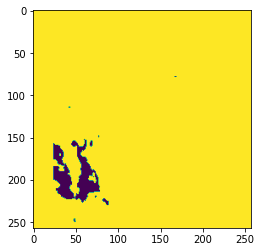

ipdb> up
> /n/home11/abanerjee/fast_ffn/fast_ffn/training/trainer.py(392)train()
    390             rois = sample['roi']
    391             ends = sample['end']
--> 392             seeds, distance = self._get_seeds(canvas, rois, sample['label'], seeds, distance)
    393 
    394             if self.cfg.SOLVER.DIST_LOGITS_EPS is not None:

ipdb> seeds, distance = self._get_seeds(canvas, rois, sample['label'], seeds, distance)
*** AssertionError: Seed label mismatch
ipdb> seeds, distance = self._get_seeds(canvas, rois, sample['label'], seeds, distance)
*** AssertionError: Seed label mismatch
ipdb> exit


In [4]:
%debug

> /n/home11/abanerjee/fast_ffn/fast_ffn/training/trainer.py(442)_get_seeds()
    440                 new_seeds.append(torch.from_numpy(partial_mask_seed))
    441                 new_distances.append(torch.from_numpy(1-partial_mask_seed))
--> 442             assert (new_seeds[i] * label[i].numpy()).sum() != 0, "Seed label mismatch"
    443         seeds = torch.stack(new_seeds).unsqueeze(1).to(self.device)
    444         distance = torch.stack(new_distances).unsqueeze(1).to(self.device)

ipdb> plt
*** NameError: name 'plt' is not defined
ipdb> import matplotlib.pyplot as plt
ipdb> plt.imshow(new_seeds[i][0]); plt.pause(1)


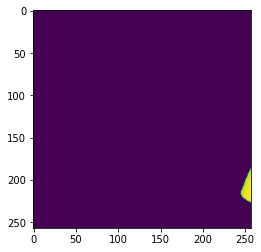

ipdb> plt.imshow(label[i][0]); plt.pause(1)


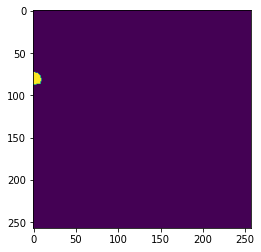

ipdb> kc = keep_connected(new_seeds[i], label[i])
*** AttributeError: 'Tensor' object has no attribute 'astype'
ipdb> kc = keep_connected(new_seeds[i], label[i].numpy())
*** AttributeError: 'Tensor' object has no attribute 'copy'
ipdb> kc = keep_connected(new_seeds[i].numpy(), label[i].numpy())
ipdb> plt.imshow(kc[0]); plt.pause(1)


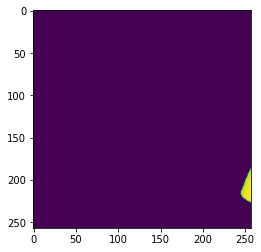

ipdb> kc = keep_connected(new_seeds[i].numpy(), 1-label[i].numpy())
ipdb> plt.imshow(kc[0]); plt.pause(1)


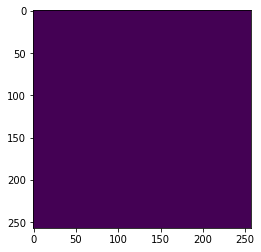

ipdb> kc.sum()
0.0
ipdb> exit


In [4]:
%debug

## Debug inference

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random
import time

import torch
import numpy as np
import scipy.ndimage
import h5py as h5

from fast_ffn.config import get_cfg_defaults, update_inference_cfg

from connectomics.model import build_model
from connectomics.data.utils import readvol
from fast_ffn.inference.movement import OriginalFFNPolicy, crop_vol_roi
from fast_ffn.movement.policies import ReversibleMovementPolicy, AggressiveMovementPolicy
from fast_ffn.inference.test_aug import TestAugmentor
from fast_ffn.inference.seed import crop_vol_seed, distance_from_seed
from fast_ffn.inference.utils import cast_and_cat

import torch
import random
import math
import numpy as np
import h5py as h5
import imageio
import matplotlib.pyplot as plt
import pickle
from tqdm.notebook import tqdm
from itertools import chain, cycle
from fast_ffn.config import get_cfg_defaults
from fast_ffn.training.dataloader.dataset import PrecomputedDataset
from fast_ffn.training.dataloader.build import build_dataloader
from connectomics.data.augmentation import build_train_augmentor
# from fast_ffn.training import Trainer, TwoStepTrainer, PrecomputedTrainer
from fast_ffn.model import build_model

cfg = get_cfg_defaults()
cfg.merge_from_file('/n/home11/abanerjee/fast_ffn/configs/Fast-FFN-SNEMI3D_Policy_Pre.yaml')
update_inference_cfg(cfg)
cfg.SYSTEM.NUM_GPUS=1
cfg.SYSTEM.PARALLEL='DP'
# cfg.DATASET.MEAN = 0.5
# cfg.DATASET.STD = 0.5

In [2]:
from connectomics.data.utils import readvol
image = readvol('/n/home11/abanerjee/pytorch_connectomics/datasets/SNEMI3D/valid_image.h5')/255
image.mean(), image.std()

(0.5854707819544062, 0.15293940236162154)

In [3]:
# with h5.File('/n/home11/abanerjee/pytorch_connectomics/datasets/SNEMI3D/valid_image.h5', 'r') as f:
#     image = f['main'][...]
#     print(f"Image shape: {image.shape}")
# with h5.File('/n/home11/abanerjee/pytorch_connectomics/datasets/SNEMI3D/valid_label.h5', 'r') as f:
#     gt_vol = f['main'][...]
#     print(f"GT shape: {gt_vol.shape}")

image = readvol('/n/home11/abanerjee/pytorch_connectomics/datasets/SNEMI3D/train-input.tif')
print(f"Image shape: {image.shape}")

gt_vol = readvol('/n/home11/abanerjee/pytorch_connectomics/datasets/SNEMI3D/valid_label.h5')
print(f"GT shape: {image.shape}")

device=torch.device('cpu')
model = build_model(cfg, device)
checkpoint = torch.load('/n/home11/abanerjee/ffn_outs/SNEMI3D/experiment_41/checkpoint_1000000.pth.tar', map_location=device)
pretrained_dict = checkpoint['state_dict']
model.module.load_state_dict(pretrained_dict) 

Image shape: (100, 1024, 1024)
GT shape: (100, 1024, 1024)
model:  FFN_FPN3D
Parallelism with DataParallel.


/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607369981906/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


<All keys matched successfully>

In [4]:
from torchvision.utils import make_grid, save_image
def check_leak(roi, gt, idx, outputs, inputs, thres=0.9, voxel_thres=1000):
    outputs = outputs[0,0].cpu().sigmoid().numpy()
    gt_crop = crop_vol_roi(gt, roi)    
    gt_crop_inv = np.logical_and(gt_crop != 0, gt_crop != idx)
    leak = np.logical_and(outputs>thres, gt_crop_inv).astype(int).sum() >= voxel_thres
    if leak:
        print(f'Leak: {np.logical_and(outputs>thres, gt_crop_inv).astype(int).sum()}')
        # 34 * (images, seeds, gt, outputs, gt+image, op+image, gt+op+image)
        # 14*34 grid
        inputs = inputs[0].cpu()
        images, seeds = inputs
        seeds = 1-seeds.sigmoid()
        images = (images * cfg.DATASET.STD) + cfg.DATASET.MEAN

        images_grid = make_grid(images.unsqueeze(1), nrow=17, padding=2)
        # images_grid = torch.cat(3*[images_grid])

        seeds_grid = make_grid(seeds.unsqueeze(1), nrow=17, padding=2)
        # seeds_grid = torch.cat(3*[seeds_grid])

        gt = torch.as_tensor((gt_crop==idx).astype(int))
        gt_grid = make_grid(gt.unsqueeze(1), nrow=17, padding=2)
        # gt_grid = torch.cat(3*[gt_grid])

        op_grid = make_grid(torch.as_tensor(outputs).unsqueeze(1), nrow=17, padding=2)
        # op_grid = torch.cat(3*[op_grid])

        gt_grid_blue = gt_grid.clone()
        gt_grid_blue[:1] = 0
        im_gt_grid = images_grid * (1-gt_grid) + images_grid * gt_grid_blue/2 + gt_grid_blue/2

        op_grid_red = (op_grid.clone() > thres).float()
        op_grid_red[1:] = 0
        im_op_grid = images_grid * (~(op_grid>thres)).float() + images_grid * op_grid_red/2 + op_grid_red/2

        im_gt_op_grid = images_grid * (~gt_grid.bool() & ~(op_grid>thres)).int()
        red = (((op_grid>thres).float() - gt_grid)==1).float()
        red[1:] = 0
        blue = ((gt_grid - (op_grid>thres).float())==1).float()
        blue[:1] = 0
        purple = ((gt_grid + (op_grid>thres).float())==2).float()
        purple[1] = 0
        im_gt_op_grid += images_grid * red/2 + red/2
        im_gt_op_grid += images_grid * blue/2 + blue/2
        im_gt_op_grid += images_grid * purple/2 + purple/2

        combined = torch.cat([images_grid, seeds_grid, gt_grid, op_grid, im_gt_grid, im_op_grid, im_gt_op_grid], dim=1)
        save_image(combined, f'leakage_debug_{voxel_thres}.png')
    return leak


initial_pos = (74, 453, 512)
idx = gt_vol[initial_pos]
print(f'Model flood fill from initial seed: {initial_pos}')

last_invalidate = [time.time()]

walker = AggressiveMovementPolicy(torch.from_numpy((image.copy().astype(np.float32)/255 - cfg.DATASET.MEAN)/cfg.DATASET.STD).to(device), 
                      torch.from_numpy(gt_vol.copy().astype(np.float32)).to(device), 
                      initial_pos, 
                      cfg.INFERENCE.INPUT_SIZE, 
                      cfg, 
                      mode='eval')
# walker = ReversibleMovementPolicy(image.copy(),
#         connected  = cfg.INFERENCE.KEEP_CONNECTED,
#         prob_thres = cfg.INFERENCE.FOREGROUND_THRES,
#         size_thres = cfg.INFERENCE.FOREGROUND_THRES_SIZE,
#         model_size = cfg.INFERENCE.INPUT_SIZE,
#         overlap_factor = cfg.INFERENCE.OVERLAP_FACTOR)
# initial_vol, relative_coord, roi = crop_vol_seed(walker.volume, initial_pos, cfg.MODEL.INPUT_SIZE)
# initial_vol = (initial_vol - cfg.DATASET.MEAN)/cfg.DATASET.STD
# distance = distance_from_seed(cfg, seed_coord=relative_coord)
# if cfg.SOLVER.DIST_LOGITS_EPS is None:
#     inputs = cast_and_cat(initial_vol, distance, torch.device('cuda:0'))
# else:
#     inputs = cast_and_cat(initial_vol, 
#             torch.from_numpy(distance).logit(cfg.SOLVER.DIST_LOGITS_EPS), 
#             torch.device('cuda:0'))

# seen = set()
# q, cubes, seeds = [roi], [], []
count = 1
while True:
    print(f'started processing roi {count}')
    # roi = q.pop(0)
    # seen.add(roi)
    try:
        roi, sub_volume, seed, sub_label = walker.step()
    except IndexError:
        break
    inputs = torch.cat([sub_volume.unsqueeze(0), seed]).unsqueeze(0)
    with torch.no_grad():
        outputs = model(inputs)
    walker.update_pred(outputs, roi, seed)
    break
    # if check_leak(roi, gt_vol, idx, outputs, inputs, cfg.INFERENCE.FOREGROUND_THRES, 5500):
    #     print('Leak found')
    #     break

    # walker.update_prediction(outputs, roi, distance)
    # new_cubes, new_seeds, roi_list = walker.expand_cube(roi) # make this lazy

#     q.extend(roi_list)
#     cubes.extend(new_cubes)
#     seeds.extend(new_seeds)
#     while len(cubes)>0 and cubes[0] is None:
#         q.pop(0)
#         cubes.pop(0)
#         seeds.pop(0)          
#     if len(cubes) == 0: break

#     inputs = cubes.pop(0)
#     inputs = (inputs - cfg.DATASET.MEAN)/cfg.DATASET.STD
#     distance = distance_from_seed(cfg, seed_mask=seeds.pop(0))
#     if cfg.SOLVER.DIST_LOGITS_EPS is None:
#         inputs = cast_and_cat(inputs, distance, torch.device('cuda:0'))
#     else:
#         inputs = cast_and_cat(inputs, 
#                     torch.from_numpy(distance).logit(cfg.SOLVER.DIST_LOGITS_EPS), 
#                     torch.device('cuda:0'))

#     count += 1
print('completed')

Model flood fill from initial seed: (74, 453, 512)
started processing roi 1
completed


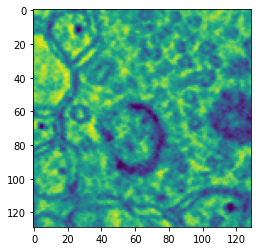

In [5]:
plt.imshow(sub_volume[0])

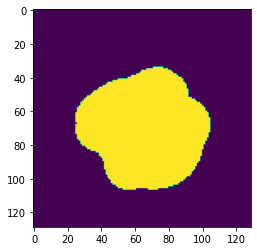

In [12]:
idx = gt_vol[74, 453, 512]
plt.imshow(crop_vol_roi(gt_vol, roi)[0]==idx)

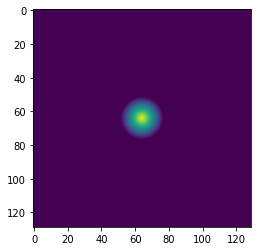

In [6]:
plt.imshow(seed[0,12])

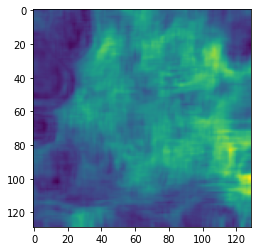

In [7]:
plt.imshow(outputs[0,0,0])

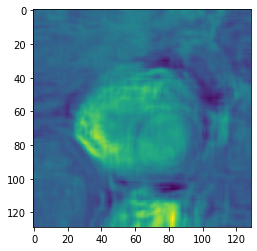

In [5]:
plt.imshow(outputs[0,0,0])

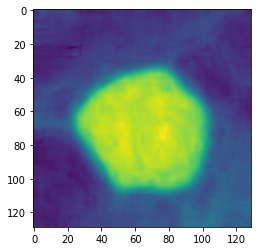

In [60]:
plt.imshow(outputs[0,0,0])

In [62]:
seed.min()

tensor(0.1559)

In [32]:
seed_coord = 10, 50, 110
seed_coord = torch.as_tensor(seed_coord, device=device)
shape = D,H,W = (25, 129, 129)
z_coord = torch.linspace(0, 1, D, device=device).view(
    -1, 1, 1).expand(shape)
y_coord = torch.linspace(0, 1, H, device=device).view(
    1, -1, 1).expand(shape)
x_coord = torch.linspace(0, 1, W, device=device).view(
    1, 1, -1).expand(shape)

dist_coords = torch.stack([z_coord * cfg.DATASET.RESOLUTION[0] * D, 
                        y_coord * cfg.DATASET.RESOLUTION[1] * H, 
                        x_coord * cfg.DATASET.RESOLUTION[2] * W])
seed_coord = seed_coord * torch.as_tensor(cfg.DATASET.RESOLUTION, device=device)
dist = dist_coords - seed_coord.view(3, 1, 1, 1)
dist = torch.sqrt((dist**2).sum(0)).unsqueeze(0) # 1,z,y,x
dist = (
    torch.clamp(dist, max=cfg.DATASET.DISTANCE_MAP.MAXIMUM_DISTANCE, min=0)
    / cfg.DATASET.DISTANCE_MAP.MAXIMUM_DISTANCE
)

In [28]:
torch.linspace(0,1,25) * 30 * 25

tensor([  0.0000,  31.2500,  62.5000,  93.7500, 125.0000, 156.2500, 187.5000,
        218.7500, 250.0000, 281.2500, 312.5000, 343.7500, 375.0000, 406.2500,
        437.5001, 468.7500, 499.9999, 531.2500, 562.5000, 593.7500, 625.0000,
        656.2500, 687.5000, 718.7500, 750.0000])

In [45]:
z_coord = torch.arange(0, D, device=device).view(
    -1, 1, 1).expand(shape)
y_coord = torch.arange(0, H, device=device).view(
    1, -1, 1).expand(shape)
x_coord = torch.arange(0, W, device=device).view(
    1, 1, -1).expand(shape)

dist_coords2 = torch.stack([z_coord * cfg.DATASET.RESOLUTION[0], 
                        y_coord * cfg.DATASET.RESOLUTION[1], 
                        x_coord * cfg.DATASET.RESOLUTION[2]])
# seed_coord = seed_coord * torch.as_tensor(cfg.DATASET.RESOLUTION, device=device)
dist2 = dist_coords2 - seed_coord.view(3, 1, 1, 1)
dist2 = torch.sqrt((dist2**2).sum(0)).unsqueeze(0) # 1,z,y,x
dist2 = (
    torch.clamp(dist2, max=cfg.DATASET.DISTANCE_MAP.MAXIMUM_DISTANCE, min=0)
    / cfg.DATASET.DISTANCE_MAP.MAXIMUM_DISTANCE
)

In [46]:
dist2.unique()

tensor([0.0000, 0.0600, 0.0849, 0.1200, 0.1342, 0.1697, 0.1800, 0.1897, 0.2163,
        0.2400, 0.2474, 0.2546, 0.2683, 0.3000, 0.3059, 0.3118, 0.3231, 0.3286,
        0.3394, 0.3447, 0.3499, 0.3550, 0.3600, 0.3650, 0.3699, 0.3795, 0.3842,
        0.3888, 0.3934, 0.4025, 0.4200, 0.4243, 0.4285, 0.4327, 0.4368, 0.4409,
        0.4530, 0.4569, 0.4609, 0.4686, 0.4724, 0.4800, 0.4837, 0.4874, 0.4948,
        0.5020, 0.5091, 0.5126, 0.5161, 0.5196, 0.5265, 0.5299, 0.5367, 0.5400,
        0.5433, 0.5466, 0.5532, 0.5564, 0.5660, 0.5692, 0.5786, 0.5909, 0.5940,
        0.5970, 0.6000, 0.6030, 0.6060, 0.6119, 0.6148, 0.6177, 0.6206, 0.6235,
        0.6264, 0.6293, 0.6378, 0.6406, 0.6434, 0.6462, 0.6490, 0.6518, 0.6573,
        0.6600, 0.6627, 0.6654, 0.6708, 0.6735, 0.6788, 0.6815, 0.6841, 0.6867,
        0.6893, 0.6946, 0.6997, 0.7023, 0.7048, 0.7099, 0.7125, 0.7150, 0.7200,
        0.7225, 0.7250, 0.7275, 0.7299, 0.7324, 0.7348, 0.7397, 0.7422, 0.7470,
        0.7518, 0.7542, 0.7589, 0.7613, 

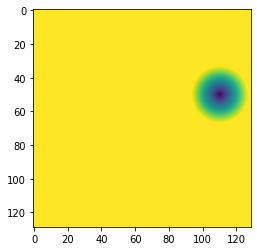

In [56]:
plt.imshow(dist2[0,10])

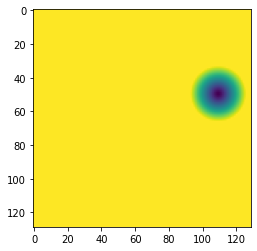

In [57]:
plt.imshow(dist[0,10])

In [37]:
torch.arange(0, D, device=device) * 30

tensor([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390,
        420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720])

In [38]:
seed_coord

tensor([300., 300., 660.])

In [29]:
seed_coord

tensor([300., 300., 660.])

In [30]:
dist.min(), dist.max()

(tensor(0.1275), tensor(1.))

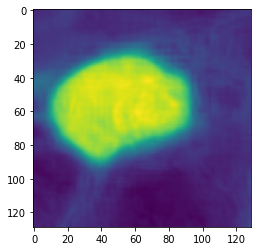

In [17]:
plt.imshow(outputs[0, 0, 12])

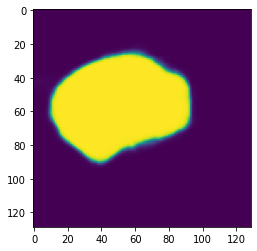

In [22]:
plt.imshow(outputs.sigmoid()[0, 0, 12])

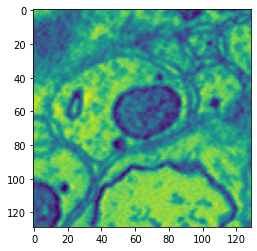

In [16]:
plt.imshow(inputs[0,0,12])

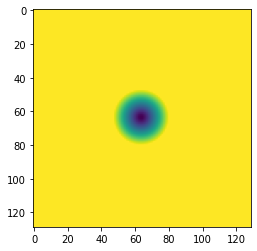

In [15]:
plt.imshow(inputs[0,1,12])

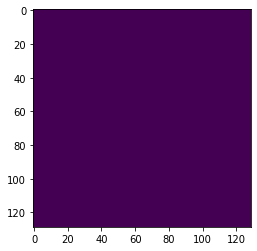

In [23]:
plt.imshow((seed < 0.1)[0,12])

In [24]:
seed.unique()

tensor([0.1559, 0.1560, 0.1561,  ..., 0.9988, 0.9988, 1.0000])

In [19]:
outputs.sigmoid().min(), outputs.sigmoid().max()

(tensor(6.6604e-06), tensor(1.0000))

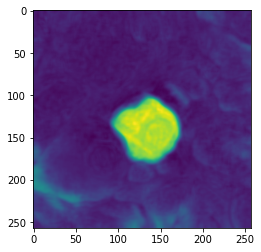

In [7]:
plt.imshow(outputs[0,0,0].cpu())

> <ipython-input-6-0a0e975a2d7f>(34)check_leak()
     32         op_grid_red = (op_grid.clone() > thres).float()
     33         op_grid_red[1:] = 0.
---> 34         im_gt_grid = images_grid * ~(op_grid>thres).int() + images_grid * op_grid_red/2 + op_grid_red/2
     35 
     36         im_gt_op_grid = images_grid * (~gt_grid.bool() & ~(op_grid>thres)).int()

ipdb> images_grid.shape
torch.Size([9, 520, 4405])
ipdb> op_grid.shape
torch.Size([9, 517, 4387])
ipdb> images.shape
torch.Size([33, 257, 257])
ipdb> plt
<module 'matplotlib.pyplot' from '/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/matplotlib/pyplot.py'>
ipdb> plt.imshow(images_grid.permute(1,2,0)[...,:3]); plt.pause(1)


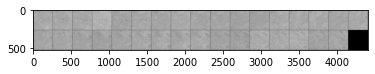

ipdb> gt.shape
torch.Size([33, 257, 257])
ipdb> gt_grid.shape
torch.Size([9, 520, 4405])
ipdb> op.shape
*** NameError: name 'op' is not defined
ipdb> outputs.shape
(33, 257, 257)
ipdb> exit


In [7]:
%debug

In [3]:
backbone = trainer.model.module.backbone

In [11]:
backbone.layer0[-1].convs[0].weight.squeeze()

tensor([[-0.1463, -0.1625,  0.1902,  ...,  0.1409,  0.0466, -0.0913],
        [ 0.0943,  0.1855, -0.0763,  ...,  0.0025,  0.0663, -0.0359],
        [-0.2210,  0.0466, -0.0610,  ..., -0.1078,  0.0339, -0.0297],
        ...,
        [-0.2090, -0.0096,  0.2286,  ...,  0.0827, -0.0855, -0.0735],
        [ 0.0724,  0.0925, -0.1979,  ...,  0.1030,  0.2029, -0.0463],
        [ 0.2703,  0.0006, -0.0940,  ..., -0.0200, -0.0293,  0.0806]],
       grad_fn=<SqueezeBackward0>)

In [17]:
backbone.layer0[-1].norm.weight

Parameter containing:
tensor([0.4617, 0.9818, 0.9559, 1.0218, 1.0016, 1.0067, 1.0027, 1.0096, 0.9815,
        1.0005, 0.9550, 0.9971, 0.9535, 0.9926, 0.9659, 0.9951, 0.9216, 0.9944,
        0.9489, 0.9998, 0.9384, 0.9861, 0.9650, 0.9937, 0.9710, 0.9862, 0.9317,
        0.9770, 0.9139, 0.9886, 0.9647, 0.9862, 0.9555, 0.9888, 0.9471, 0.9795,
        0.9572, 0.9954, 0.9486, 0.9870, 0.9420, 0.9765, 0.9711, 0.9847, 0.9410,
        0.9933, 0.9461, 0.9898, 0.9223, 1.0002, 0.9506, 0.9954, 0.9426, 0.9939,
        0.9487, 0.9909, 0.9299, 1.0028, 0.9663, 0.9988, 0.9591, 0.9910, 0.9730,
        0.9839, 0.9754, 0.9930, 0.9608, 0.9842, 0.9533, 0.9911, 0.9707, 0.9881,
        0.9553, 0.9916, 0.9891, 0.9844, 0.9575, 0.9910, 0.9669, 0.9958, 0.9248,
        0.9909, 0.9646, 0.9988, 0.9625, 1.0012, 0.9696, 0.9919, 0.9375, 0.9795,
        0.9605, 0.9933, 0.9406, 0.9782, 0.9613, 0.9945, 0.9265, 0.9952, 0.9554,
        0.9977, 0.9718, 0.9937, 0.9701, 0.9812, 0.9054, 0.9943, 0.9543, 0.9833,
        0.9503, 0.

In [13]:
backbone.layer0[-1].depth, backbone.layer0[-1].height, backbone.layer0[-1].width

(Parameter containing:
 tensor([-1.0344,  0.5570,  0.8286, -0.8646, -0.1372, -0.3602,  0.1069,  0.0895,
         -0.0870, -0.3171,  0.6596,  0.0486, -0.5053, -0.4229, -0.1352, -0.7743,
         -0.8728,  0.5947,  0.3893, -0.3296, -0.4326, -0.6142, -0.1472,  1.2238,
         -0.1162], requires_grad=True),
 Parameter containing:
 tensor([-0.6734,  0.0451, -0.5615,  0.4629,  0.3942, -0.0806, -0.9010,  0.4280,
         -0.0292, -0.3237, -0.2139, -0.1554,  0.5677, -0.1455,  0.7054,  0.3994,
          0.1854, -0.5425, -0.2010,  0.6264,  0.3334,  0.5382,  0.7376,  0.2708,
          0.8114,  0.4669, -0.1961,  0.2081,  0.4538, -0.4170, -0.2275, -0.0204,
         -0.0989, -0.0371,  0.2132,  0.3643,  0.7102,  1.1556, -0.4765,  0.2839,
         -0.2166,  0.0316,  0.2906, -0.5410,  0.0701, -0.2241, -0.3568, -0.6660,
          0.1247, -1.2236, -0.1279, -0.7927,  1.2009,  0.8491, -0.1458,  0.2159,
         -0.0888,  0.1733,  0.1195, -0.9453, -0.0758, -0.1388,  0.4172, -0.1072,
          0.0191, -0.76

In [1]:
import torch
import torch.nn as nn

In [3]:
nn.Linear(10,15)(torch.randn(1,8,8,8,10)).shape

torch.Size([1, 8, 8, 8, 15])

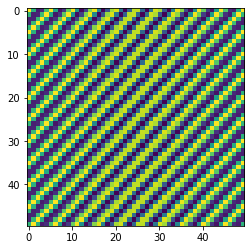

In [7]:
import matplotlib.pyplot as plt
import torch.fft


freq = torch.zeros(50,50)
freq[10,10] = 1

im = torch.fft.ifft(freq.view(-1)).view(50,50)
plt.imshow(im.real)

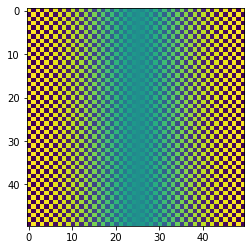

In [8]:
import matplotlib.pyplot as plt
import torch.fft


freq = torch.zeros(50,50)
freq[25,25] = 1

im = torch.fft.ifft(freq.view(-1)).view(50,50)
plt.imshow(im.real)

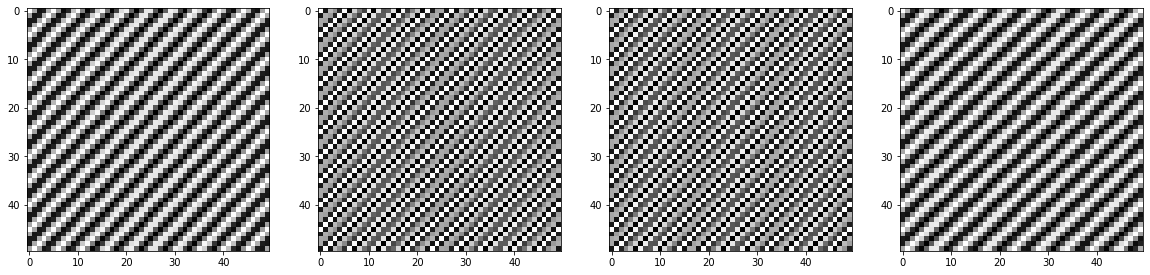

In [16]:
inds = torch.arange(10, 50, 10)
fig, ax = plt.subplots(1,len(inds), figsize=(20,20))

for i,ind in enumerate(inds):
    freq = torch.zeros(50,50)
    freq[ind, ind]= 1
    ax[i].imshow(torch.fft.ifft(freq.view(-1)).view(50,50).real, cmap='gray')

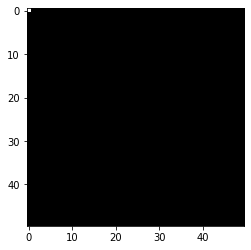

In [21]:
plt.imshow(torch.fft.ifft(torch.ones(2500)).view(50,50).real, cmap='gray')

In [25]:
t = torch.arange(4)

for _ in range(4):
    t = torch.fft.fft(t)
    print(t)

tensor([ 6.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])
tensor([ 0.+0.j, 12.+0.j,  8.+0.j,  4.+0.j])
tensor([24.+0.j, -8.-8.j, -8.+0.j, -8.+8.j])
tensor([ 0.+0.j, 16.+0.j, 32.+0.j, 48.+0.j])
